## 1. Introduction

Suppose you want to build a regression and parametric classification model on a set of cases, where each case is described in terms of several variables. Without knowing anything else about the data set, give a reasoned justification:

a) Explain in your own words what is the main difference between supervised and unsupervised learning methods.  Give an example of the application of each type of method. Describe briefly the input and output variables you would consider in each example.

***In a supervised learning method model, we previously know the classification of each element in the training prior to the analysis, while in the non-supervised we dont have that previous information, thus in the training and the test, the input is the parameters matrix, and the output is the classification. An example of supervised would be, for example, a classification of a database of patients in terms of age, sex, occupation (in conclusion, data that are variables of the database). On the other hand, a non-supervised would be for example, evaluate wether there will be or not any post-surgycal complication based on different parameters like age, blood thickness, other diseases...***

b) Explain in your own words the main difference between a linear and a non-linear model


***A linear model has a function which parameters are of degree 1, which is of the type f(x)=a+bx.
A non linear model, on the other hand, has paramters of degree 2 or higher, making it quadratic, cubic, exponential, logarithmic...***

c)  Explain in your own words what is the main difference between soft and hard output of a learning model. Indicate which of the methods presented in theory provide a soft output and which provide a hard output.


***Soft prediction will return a (predicted) probability of the data point belonging in one of the classes, while hard predictioons returns the class the model predicts, given the point. In general, unsupervised machine learning methods do not have a whole characterization of the problem, thus the optimal output given will be soft. But in some other prblems like classification problems or logistic regression, where the output will be 0 or 1, we could say that the output given is a hard output.***


d)  Explain the concept of overfitting and generalization. If you wish, you can support your answer with an outline or drawing. Explain in your own words how you could get the designed model to generalize well.


***Overfitting refers to a model that trains the data "too well". That is, that the model is learning by heart by over-training the data set, adjusting to it. This makes the algorithm non-replicable to other data sets.
Generalization is when the "adquired knowledge" in the training of the algorith is valid for various cases, with different data sets. This means that the basic characterization of the research problem has been achieved.***


For the development of this second practice, the database "Pima Indian Diabetes" already pre-processed will be analyzed, where the rows of the file correspond to the cases and the columns to the variables.

For this practice, the data will be divided into two subsets: training and test. In addition, the validation scheme called k-fold cross validation will be considered.

## 2. Cross-validatioin

For this practice, the validation scheme called k-fold cross validation will be considered. Remember that in this approach, the available cases are randomly divided into k subsets of the same size called "folds".

a) Indicate what a k-fold cross-validation scheme can be used for.




***Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.This is used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.***

b) Justify reasonably which models will need to follow a cross-validation scheme.


***Overall unsupervised models with small datasets will need this k-fold method in order to "amplify" this dataset. This will help us to have a better characterization of the research problem by increasing training variation, i other words is like give the algorythm the sensation of training with a much larger dataset***


c) As discussed in the theoretical classes, it is common in health to have a different number of cases in each class (unbalanced classes). Taking into account the database of this practice, please explain in detail what two performance measures you would consider in order to analyze the results with different parametric schemes.


***In this database there is an imbalance, since we got 500 non-diabetics vs 268 diabetics, in order to fix this there are certain methods as data augmentation that consists on adding data to the database in a way that the computer detect it as valid data, other solution will be to make the algorithm (usually on deep learning methods) to give more attention to errors commited on missdetection of diabetics (since are the under-represented group)***

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [31]:
#Load data
data = pd.read_csv("pima_indian_diabetes.csv") #We can change this database
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
print("There are ",data[data.Outcome == 0].shape[0],"Non-Diabetics on the dataset")
print("There are ",data[data.Outcome == 1].shape[0],"Diabetics on the dataset")

There are  500 Non-Diabetics on the dataset
There are  268 Diabetics on the dataset


## 3. Simple Linear Regression

Linear regression allows us to establish the relationship between a dependent variable and one or more explanatory variables. This technique is used when the relationship between the variables is linear. 

Indicate:

a) What is the dependent variable that you could consider to address a linear regression problem?

***The dependent variable, denoted Y, is going to rely on the independent variable X for the lineal regression analysis to study the relationship between the two variables. In this case, we will plot the correlation matrix to pick two variables, and determine the lineal regression between them.***

b) Which variable is the one that allows better estimation of the dependent variable? You can be helped by the value of the correlation coefficient, as well as by some performance measures that you consider appropriate to evaluate the performance of the regressor.


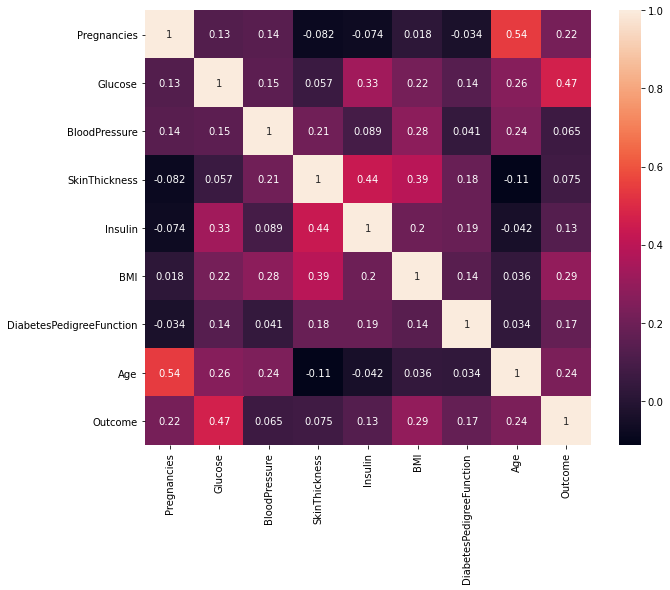

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

***If we treated the "Insulin" as the dependent variable Y, we can see that the variable that better predicts the result, since it appears to have some correlation, would be "Glucose".***

c) Indicate whether the performance obtained in the test set change after normalizing the variables.


***Firstly, we are going to perform lineal regression without normalizing the two chosen variables, removing the missing values***

In [69]:
data = data[data.BMI !=0]
data = data[data.BloodPressure !=0]
data = data[data.DiabetesPedigreeFunction !=0]
data = data[data.Glucose !=0]
data = data[data.Insulin !=0]
data = data[data.SkinThickness !=0]

In [70]:
#Create input and output data
x = data[["Glucose"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 1), (392, 1))

In [71]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.37633920710597113
MSE: 106.71274748954104
MAE: 65.84399632240422


***Now we normalize the variables and repeat the process to see wether we obtain a higher R squared or not***

In [73]:
x = data[["Glucose"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 1), (392, 1))

In [74]:
x1 = (x - x.mean())/x.std()
y1 = (y - y.mean())/y.std()

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [75]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.39631447227101047
MSE: 0.7888862892958379
MAE: 0.5101636406427672


## 4. Multiple Linear Regresion

In this section we will analyze:

a) How the value of the estimators, the correlation coefficient and the performance measures change when we change the number of explanatory variables.

***2 Features***

In [41]:
#Create input and output data
x = data[["Glucose", "SkinThickness"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 2), (392, 1))

In [42]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.35204727554715354
MSE: 109.52797365170426
MAE: 72.4544388818426


***3 Features***

In [44]:
#Create input and output data
x = data[["Glucose", "SkinThickness", "BMI"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 3), (392, 1))

In [45]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.21473798947302059
MSE: 99.81099393066968
MAE: 69.70756649168459


***All features***

In [47]:
#Create input and output data
x = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 7), (392, 1))

In [48]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.2769180477262353
MSE: 106.68334937125294
MAE: 66.98018096883973


***Now, normalizing them (Only for the 3 variables)***

In [50]:
#Create input and output data
x = data[["Glucose", "SkinThickness", "BMI"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 3), (392, 1))

In [51]:
x1 = (x - x.mean())/x.std()
y1 = (y - y.mean())/y.std()

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [52]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

print("R2:", model.score(X_test,Y_test))
print("MSE:", mean_squared_error(Y_test, model.predict(X_test), squared=False))
print("MAE:", mean_absolute_error(Y_test, model.predict(X_test)))

R2: 0.39043219375808036
MSE: 0.7342285265244022
MAE: 0.4899045321301268


b) The most relevant feautures. Explain in detail the process you have followed and justify which characteristics are most relevant to you in this database.

Note: you may have to repeat this section with a different number of variables in order to draw valid conclusions.

Feature: 0, Score: -2.62765
Feature: 1, Score: 2.12007
Feature: 2, Score: -0.59238
Feature: 3, Score: -0.06935
Feature: 4, Score: 2.04903
Feature: 5, Score: 11.29126
Feature: 6, Score: 0.98583


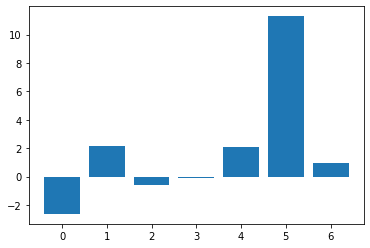

In [53]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
x = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Insulin"]

# define the model
model = LinearRegression()

# fit the model
model.fit(x, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 5. Non-linear regression


Many of the relationships between variables we study are non-linear. As we have seen in theory, we can highlight the functions logarithmic, inverse, quadratic, cubic, power, exponential, etc.

a) Include which non-linear functions best fit the available data.

In [54]:
#Create input and output data
x = data[["Glucose"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 1), (392, 1))

In [55]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

***Exponential***

In [56]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
def EvaluateRegression(Test_data,Predict_data):
    MAE = np.round(metrics.mean_absolute_error(Test_data, Predict_data),3)
    MSE = np.round(metrics.mean_squared_error(Test_data, Predict_data),3)
    RMSE = np.round(np.sqrt(metrics.mean_squared_error(Test_data, Predict_data)),3)
    print('Mean absolute error :',MAE)
    print('Mean square error :',MSE)
    print('RMSE :',RMSE)
    return MAE,MSE,RMSE

In [57]:
x1 = np.log(x)
y1 = np.log(y)

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

poly = PolynomialFeatures(degree=1)
linear_poly = LinearRegression()
X_train_rdy = poly.fit_transform(X_train)
linear_poly.fit(X_train_rdy,Y_train)
X_test_rdy = poly.fit_transform(X_test)

Input_model= linear_poly

MAE, MSE, RMSE = EvaluateRegression(Y_test,  Input_model.predict(X_test_rdy))

Mean absolute error : 0.433
Mean square error : 0.356
RMSE : 0.596


***Quadratic***

In [58]:
#Create input and output data
x = data[["Glucose"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 1), (392, 1))

In [59]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [60]:
poly = PolynomialFeatures(degree=2)
linear_poly = LinearRegression()
X_train_rdy = poly.fit_transform(X_train)
linear_poly.fit(X_train_rdy,Y_train)
X_test_rdy = poly.fit_transform(X_test)

Input_model= linear_poly

MAE, MSE, RMSE = EvaluateRegression(Y_test,  Input_model.predict(X_test_rdy))

Mean absolute error : 61.697
Mean square error : 7953.936
RMSE : 89.185


***Qubic***

In [61]:
poly = PolynomialFeatures(degree=3)
linear_poly = LinearRegression()
X_train_rdy = poly.fit_transform(X_train)
linear_poly.fit(X_train_rdy,Y_train)
X_test_rdy = poly.fit_transform(X_test)

Input_model= linear_poly

MAE, MSE, RMSE = EvaluateRegression(Y_test,  Input_model.predict(X_test_rdy))

Mean absolute error : 61.614
Mean square error : 7973.486
RMSE : 89.294


b) Indicate whether the performance obtained in the test set changes after normalizing the variables.

***Exponential***

In [62]:
x1 = np.log(x)
y1 = np.log(y)

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [63]:
# Normalize variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
Y_train_norm = scaler.transform(Y_train)
Y_test_norm = scaler.transform(Y_test)

In [64]:
poly = PolynomialFeatures(degree=1)
linear_poly = LinearRegression()
X_train_rdy = poly.fit_transform(X_train)
linear_poly.fit(X_train_rdy,Y_train)
X_test_rdy = poly.fit_transform(X_test)

Input_model= linear_poly

MAE, MSE, RMSE = EvaluateRegression(Y_test,  Input_model.predict(X_test_rdy))

Mean absolute error : 0.464
Mean square error : 0.399
RMSE : 0.632


***Quadratic***

In [65]:
#Create input and output data
x = data[["Glucose"]]
y = data[["Insulin"]]

x.shape, y.shape

((392, 1), (392, 1))

In [66]:
x1 = (x - x.mean())/x.std()
y1 = (y - y.mean())/y.std()

x, y = shuffle(x1,y1, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [67]:
poly = PolynomialFeatures(degree=2)
linear_poly = LinearRegression()
X_train_rdy = poly.fit_transform(X_train)
linear_poly.fit(X_train_rdy,Y_train)
X_test_rdy = poly.fit_transform(X_test)

Input_model= linear_poly

MAE, MSE, RMSE = EvaluateRegression(Y_test,  Input_model.predict(X_test_rdy))

Mean absolute error : 0.49
Mean square error : 0.42
RMSE : 0.648


***Qubic***

In [68]:
poly = PolynomialFeatures(degree=3)
linear_poly = LinearRegression()
X_train_rdy = poly.fit_transform(X_train)
linear_poly.fit(X_train_rdy,Y_train)
X_test_rdy = poly.fit_transform(X_test)

Input_model= linear_poly

MAE, MSE, RMSE = EvaluateRegression(Y_test,  Input_model.predict(X_test_rdy))

Mean absolute error : 0.496
Mean square error : 0.424
RMSE : 0.651


## 6. Logistic regression

In this section it is requested:

a) To design a logistic regression model using the training and test subsets described above. Clearly indicate what the desired output is.

In [134]:
#Create input and output dataa
x = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]

x.shape, y.shape

((392, 8), (392,))

In [135]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
model.fit(X_train, Y_train)

model.predict(X_test)
model.score(X_test, Y_test)

0.7653061224489796

b) Discuss the confusion matrix as well as the results obtained based on two evaluation measures considered.

In [138]:
confusion_matrix(Y_test, model.predict(X_test))

array([[57,  6],
       [17, 18]], dtype=int64)

c) Indicate whether the performance obtained in the test set changes after normalizing the variables.

In [139]:
# Normalize variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
model.fit(X_train_norm, Y_train)

model.predict(X_test_norm)
model.score(X_test_norm, Y_test)

0.7959183673469388

d) Justify which characteristics are more relevant in this case.

## 7. Comparison of the results obtained with the different classifiers
## Assigment 2!!

Provide in a table the performance measures  obtained both in the validation and test set  by the different models designed.

In [80]:
#Load data
tabla = pd.read_excel("tabla.xlsx") #We can change this database
tabla.head()

,·,Linear,Linear Norm,Multi (3),Multi (3) Norm,Exp,Exp Norm,Quad,Quad Norm,Qub,Qub Norm
0,R2,0.38,0.40,0.21,0.39,-,-,-,-,-,-
1,MSE,106.71,0.79,29.81,0.73,0.36,0.40,7953.94,0.42,7973.49,0.42
2,MAE,65.84,0.51,69.70,0.49,0.43,0.46,61.70,0.49,61.61,0.50
3,RMSE,-,-,-,-,0.60,0.63,89.19,0.65,89.29,0.65


In view of the results obtained, please answer, if possible, the following questions:

a) Justify whether the fact of normalizing the feature's values influence the results obtained.

***As we have seen above, normalizing a variable does change the "measurement" results, such as MAE or MSE, as we have checked with Simple Linear Regression and Non-Linear regression. It also does affect the performance of the estimators, like in logistic regression, improving it in this case.***

b) Reasonably justify whether you would use a linear or non-linear parametric scheme. Indicate and justify the scheme that provides the best performance in the set of tests.


***In  our case, the best performance obtained for the MSE was in the Exponential Regression, with a value of 0.399.***

c) Indicate and justifiy which are the most relevant feautures as well as the procedure to identify them.


***For simple linear correlation, we can check the correlation among variables in the correlation matrix.
For multiple linear regression we computed an iteration of the relationships between features and the variable "Insulin" and we computed every score to see the prior weight of each feature on the outcome decission.*** 

d) Indicate and justify  whether the fact of making a single partition of the cases in the training and test sets can influence the results obtained. Starting from the original data, make a new partition of the cases in the training and test sets. Select one of the analyzed classifiers (indicate the chosen classifier) and obtain again the confusion matrix and the evaluation measures. Comment the obtained results. 

***As we can see, we have increased the test size proportion (from 0.25 which is default to 0.3), and the accuracy obtained in this case is lower than the original one. Nevertheless, for this new configuration there are more true positives in the confussion matrix, but there are more false positives.***

In [141]:
#Create input and output dataa
x = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]

x.shape, y.shape

((392, 8), (392,))

In [142]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
model.fit(X_train, Y_train)

model.predict(X_test)
model.score(X_test, Y_test)

0.7288135593220338

In [145]:
confusion_matrix(Y_test, model.predict(X_test))

array([[64, 10],
       [22, 22]], dtype=int64)